## Proyecto 3 – Agrupación de datos sobre obesidad.
### Carlos Gabriel Contreras

In [118]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from scipy.linalg import eigh
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [122]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

### Parte 1: Descripción univariada de la información

In [124]:
data = X.copy()

quantitative_vars = data.select_dtypes(include=[np.number])
qualitative_vars = data.select_dtypes(exclude=[np.number])

quantitative_summary = pd.DataFrame({
    'Casos': quantitative_vars.count(),
    'Perdidos': quantitative_vars.isnull().sum(),
    'Media': quantitative_vars.mean(),
    'Intervalo Inferior IC 95%': quantitative_vars.apply(lambda x: stats.t.interval(0.95, len(x.dropna())-1, loc=np.mean(x.dropna()), scale=stats.sem(x.dropna()))[0]),
    'Intervalo Superior IC 95%': quantitative_vars.apply(lambda x: stats.t.interval(0.95, len(x.dropna())-1, loc=np.mean(x.dropna()), scale=stats.sem(x.dropna()))[1]),
    'Desviación Estándar': quantitative_vars.std(),
    'Mínimo': quantitative_vars.min(),
    'Máximo': quantitative_vars.max()
})

qualitative_summary = qualitative_vars.apply(lambda x: x.value_counts(normalize=True, dropna=False)).T
qualitative_summary = qualitative_summary.applymap(lambda x: '' if pd.isna(x) else x)

print("Resumen de Variables Cuantitativas")
display(quantitative_summary) 

print("\nResumen de Variables Cualitativas")
display(qualitative_summary)



Resumen de Variables Cuantitativas


/var/folders/f_/4_ll11tj4236rs5ly_gcd0tm0000gn/T/ipykernel_2472/2406632355.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qualitative_summary = qualitative_summary.applymap(lambda x: '' if pd.isna(x) else x)


,Casos,Perdidos,Media,Intervalo Inferior IC 95%,Intervalo Superior IC 95%,Desviación Estándar,Mínimo,Máximo
Age,2111,0,24.312600,24.041736,24.583464,6.345968,14.00,61.00
Height,2111,0,1.701677,1.697695,1.705660,0.093305,1.45,1.98
Weight,2111,0,86.586058,85.468145,87.703971,26.191172,39.00,173.00
FCVC,2111,0,2.419043,2.396254,2.441833,0.533927,1.00,3.00
NCP,2111,0,2.685628,2.652419,2.718837,0.778039,1.00,4.00
CH2O,2111,0,2.008011,1.981849,2.034174,0.612953,1.00,3.00
FAF,2111,0,1.010298,0.973992,1.046603,0.850592,0.00,3.00
TUE,2111,0,0.657866,0.631875,0.683857,0.608927,0.00,2.00



Resumen de Variables Cualitativas


,Always,Automobile,Bike,Female,Frequently,Male,Motorbike,Public_Transportation,Sometimes,Walking,no,yes
Gender,,,,0.494079,,0.505921,,,,,,
family_history_with_overweight,,,,,,,,,,,0.182378,0.817622
FAVC,,,,,,,,,,,0.116059,0.883941
CAEC,0.025107,,,,0.114638,,,,0.836097,,0.024159,
SMOKE,,,,,,,,,,,0.979157,0.020843
SCC,,,,,,,,,,,0.954524,0.045476
CALC,0.000474,,,,0.03316,,,,0.663667,,0.3027,
MTRANS,,0.216485,0.003316,,,,0.005211,0.74846,,0.026528,,


## Paso 2: Análisis de correlaciones, KMO e indice de esfericidad de Bartlet entre variables cuantitativas

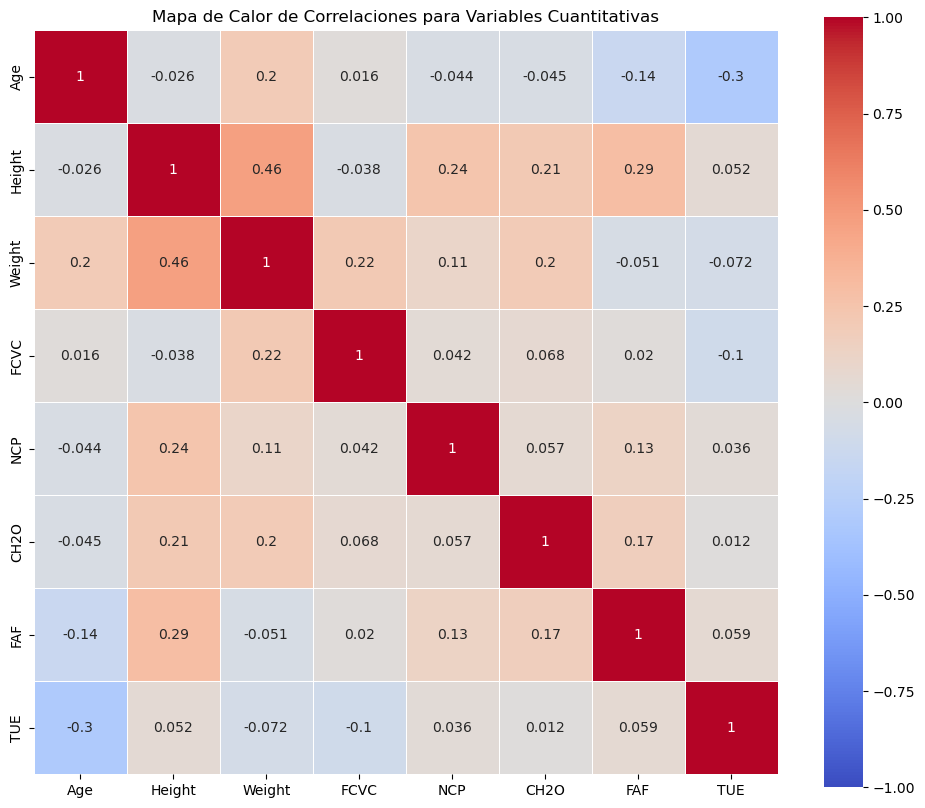

In [126]:
quantitative_vars = X.select_dtypes(include=[np.number])  

correlation_matrix = quantitative_vars.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones para Variables Cuantitativas')
plt.show()


Visualmente, se puede observar algunas nubes de correlación esperadas aunque todas son relaciones débiles. Un supuesto importante para proceder con análisis de componentes principales, implica analizar la esfericidad y la convergencia de la matriz de correlación entre las variables. En este contexto, se procede a ejecutar pruebas estadísticas, Indice KMO y prueba de esfericidad de Barttlet

In [128]:

def calculate_kmo(data):
    corr_matrix = np.corrcoef(data, rowvar=False)
    inv_corr_matrix = np.linalg.inv(corr_matrix)
    n, p = data.shape

    # Calcular KMO
    aii = np.diag(corr_matrix)  # Autocorrelaciones
    bjj = np.diag(inv_corr_matrix)  # Inverso de la autocorrelación
    kmo_num = np.sum(np.abs(corr_matrix) - np.diag(aii))
    kmo_denom = kmo_num + np.sum(np.abs(inv_corr_matrix) - np.diag(bjj))
    kmo_value = kmo_num / kmo_denom

    return kmo_value


def bartlett_sphericity(data):
    corr_matrix = np.corrcoef(data, rowvar=False)
    n, p = data.shape
    chi2_value = -((n - 1) - (2 * p + 5) / 6) * np.log(np.linalg.det(corr_matrix))
    df = p * (p - 1) / 2
    p_value = 1 - chi2.cdf(chi2_value, df)
    return chi2_value, df, p_value

data = quantitative_vars.dropna()  


kmo_value = calculate_kmo(data.values)
print(f'Índice KMO: {kmo_value:.4f}')


chi2_value, df, p_value = bartlett_sphericity(data.values)
print(f'Chi-cuadrado Bartlett: {chi2_value:.4f}, df: {df}, p-value: {p_value:.4f}')


Índice KMO: 0.4451
Chi-cuadrado Bartlett: 1679.3981, df: 28.0, p-value: 0.0000


Con un KMO de 0.4451, los datos muestran una baja adecuación para PCA, sugiriendo que las variables no están suficientemente correlacionadas para identificar factores o componentes significativos. En este caso, puede ser mejor:

1. Revisar las variables para ver si algunas pueden excluirse.
2. Considerar transformar algunas variables.
3. Evaluar si hay otras variables mejor correlacionadas que puedan incorporarse.

La prueba de esfericidad de Bartlett evalúa la hipótesis nula de que la matriz de correlación es una matriz identidad (sin correlación entre variables). Con un p-valor de 0 se rechaza la hipótesis de una matriz de identidad, sugiriendo que hay alguna correlación entre variables.

KMO bajo y Bartlett significativo: El PCA es posible, pero los datos no muestran un ajuste óptimo para este tipo de análisis.

## Paso 3: Análisis de componentes principales entre las variables cuantitativas

1. Se estandarizan los datos y se procede a ejecutar un PCA con datos estandarizados.
2. Usando el método de codo se elige un número eficiente de componentes principales.
3. 5 componentes principales explican el 77% de la varianza
4. Al graficar la componente 1 y 2 (que explican el 22% y 41%) se observa una correlación significativa entre CH20 - Height y NPC
5. Distante a la edad, se observa una correlación relativamente fuerte entre FAF y TUE
6. Correlación fuerte entre edad y FCVC
   

Tabla de Varianza Explicada y Acumulada por Componentes Principales


,Componente Principal,Varianza Explicada,Varianza Acumulada
0,PC1,0.226486,0.226486
1,PC2,0.186579,0.413065
2,PC3,0.126454,0.539519
3,PC4,0.118864,0.658383
4,PC5,0.117578,0.775961
5,PC6,0.096722,0.872683
6,PC7,0.081946,0.954630
7,PC8,0.045370,1.000000


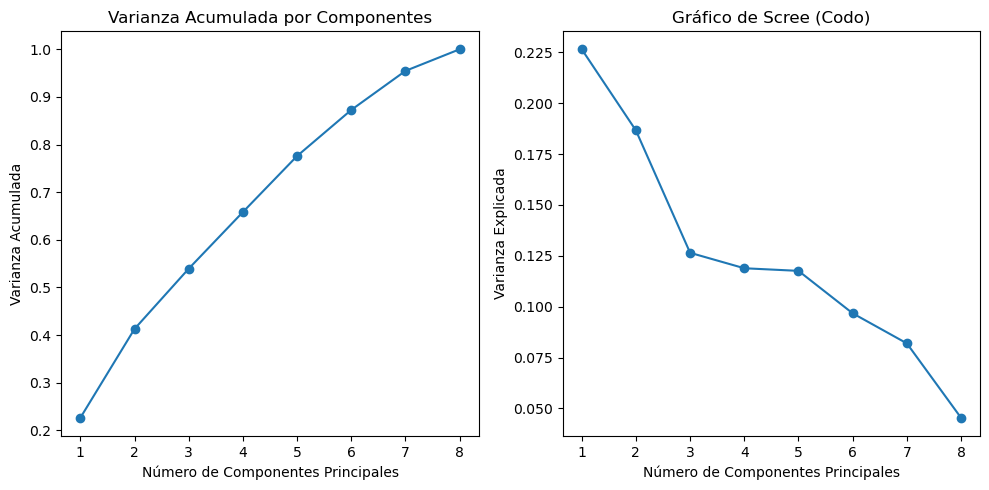

Número adecuado de componentes principales: 6
Base de Datos con Componentes Principales


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,PC1,PC2,PC3,PC4,PC5,PC6
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,-1.333029,-0.689743,-0.305922,-0.733236,0.103475,1.171206
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,-0.087728,-0.727529,2.067507,2.956012,0.384996,0.994520
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0.828980,-1.305978,-0.898384,0.475035,0.058444,-0.422251
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1.305491,0.572544,0.366069,1.250744,0.792708,-0.680997
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,-0.690310,0.842111,-0.478263,-0.111392,-1.853180,-0.656402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1.308977,0.050855,0.890030,-0.685840,0.644063,-0.963333
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1.637764,0.536557,0.793394,-0.596949,0.399693,-0.598760
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1.720038,0.508361,0.780803,-0.560407,0.346816,-0.598739
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,2.029482,0.788680,1.045579,-0.377248,-0.362826,0.433839


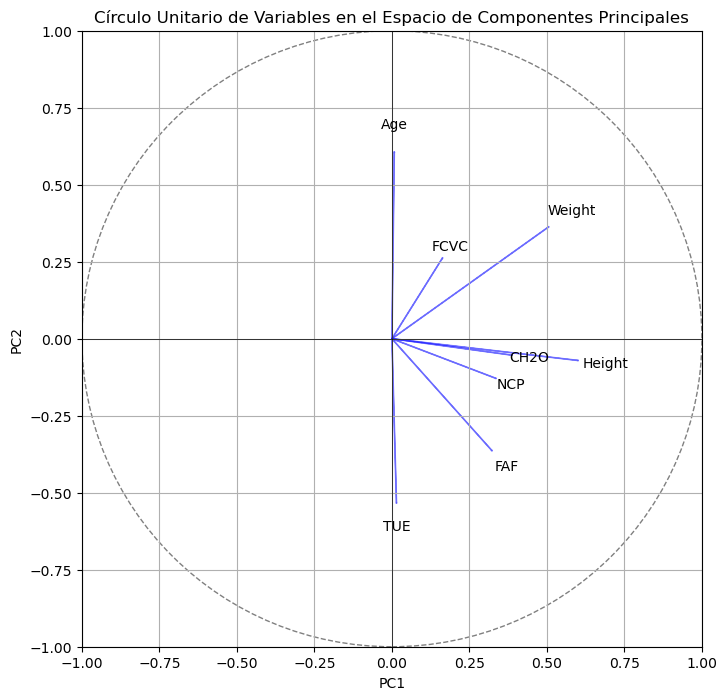

/Users/ccs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ccs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ccs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ccs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

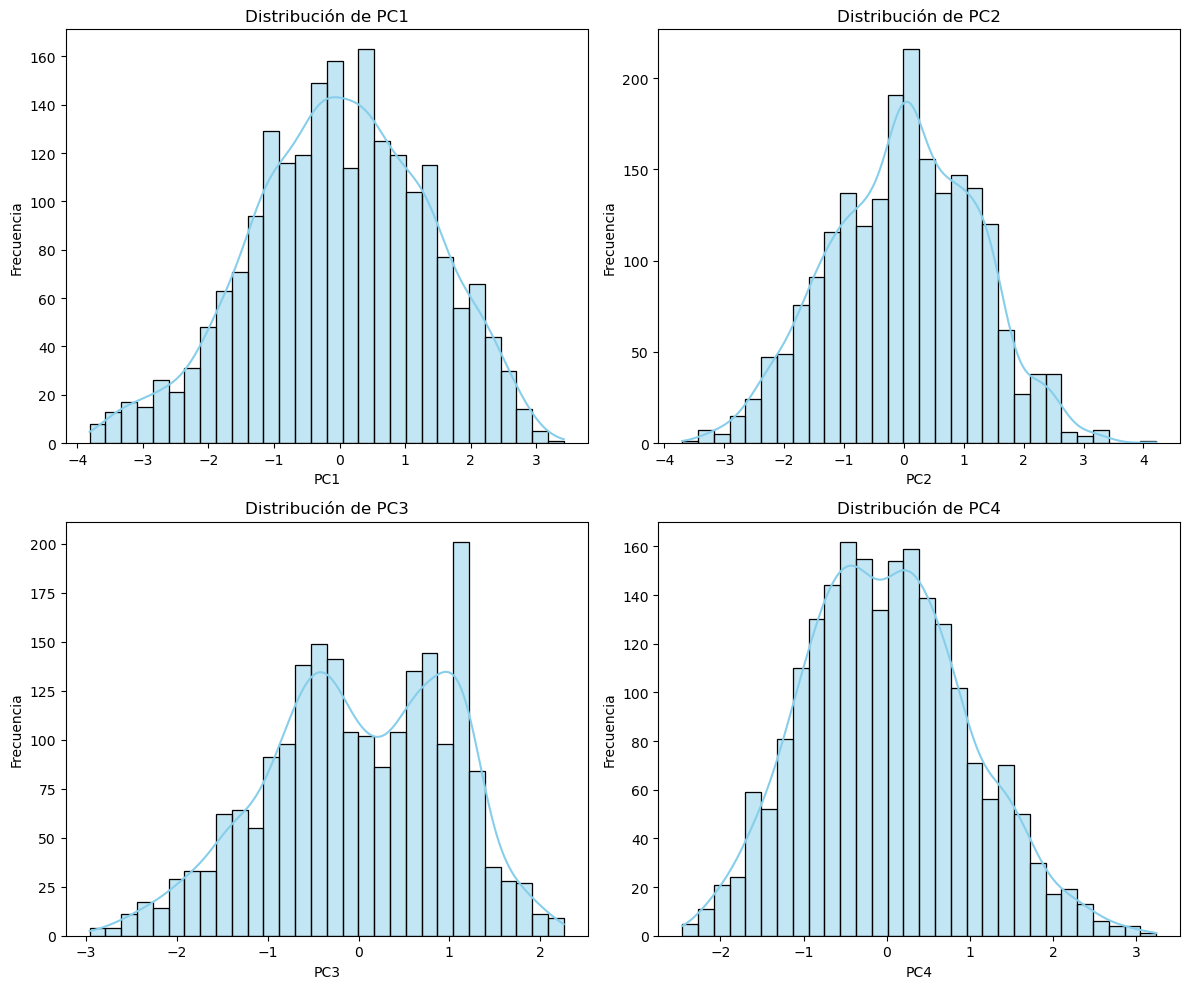

In [151]:

quantitative_vars = X.select_dtypes(include=[np.number])
quantitative_data = quantitative_vars.dropna()  # Eliminamos filas con valores nulos


scaler = StandardScaler()
quantitative_data_std = scaler.fit_transform(quantitative_data)


pca = PCA()
pca.fit(quantitative_data_std)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


pca_variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza Explicada': explained_variance,
    'Varianza Acumulada': cumulative_variance
})


print("Tabla de Varianza Explicada y Acumulada por Componentes Principales")
display(pca_variance_df)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por Componentes')


plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Scree (Codo)')
plt.tight_layout()
plt.show()


num_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f'Número adecuado de componentes principales: {num_components}')


pca_optimal = PCA(n_components=num_components)
principal_components = pca_optimal.fit_transform(quantitative_data_std)


principal_components_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(num_components)], index=quantitative_data.index)
data_with_pcs = quantitative_data.join(principal_components_df)


print("Base de Datos con Componentes Principales")
display(data_with_pcs)


plt.figure(figsize=(8, 8))
for i in range(len(quantitative_data.columns)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='b', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, quantitative_data.columns[i], color='black', ha='center', va='center')


circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Círculo Unitario de Variables en el Espacio de Componentes Principales")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()



principal_components_df = principal_components_df.iloc[:, :4] 


plt.figure(figsize=(12, 10))
for i, column in enumerate(principal_components_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(principal_components_df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


En principio, las componentes principales no estpan correlacionadas entre si y exceptuando la componente 3, tiende a tener una distribución lepticurtica, centrada.

## Paso 5: Modelos de clasificación, Kmedias vs Jerárquico

1. Se planifica un algoritmo de KMedias que correrá entre 2 y 11 clusters escogiendo la solución con mejor indice de silueta. Resulta ser una solución con seis clusters.
2. Se propone un algoritmo de cluster jerárquico, tambien entre 2 y 11 clusters. En este método la solución con mejor silueta es 2 clusters.
   

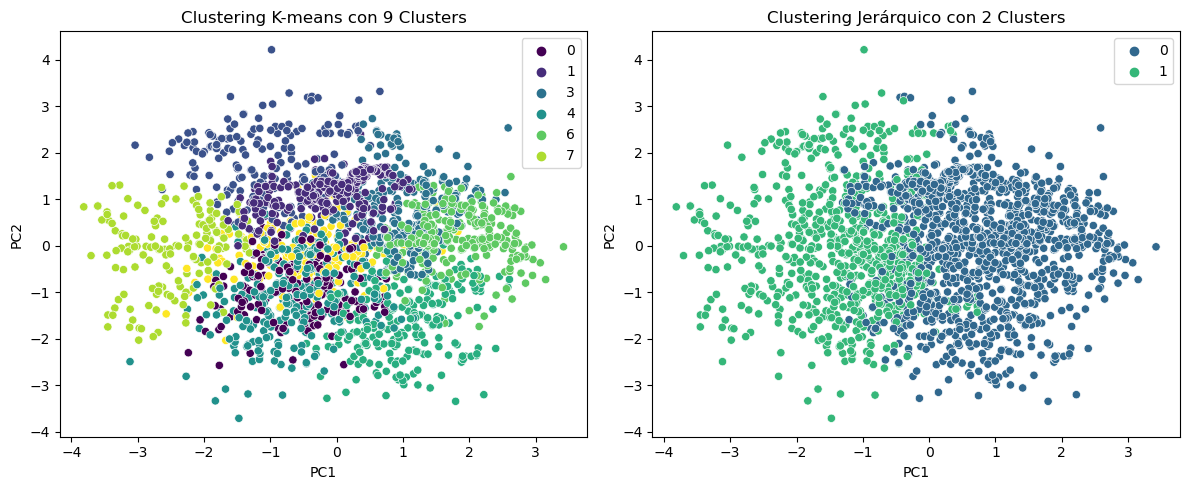

In [133]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

range_n_clusters = list(range(2, 11))

# K-means
silhouette_scores_kmeans = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_components_df)
    silhouette_avg = silhouette_score(principal_components_df, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

best_k_kmeans = range_n_clusters[np.argmax(silhouette_scores_kmeans)]

# Clustering jerárquico
silhouette_scores_hierarchical = []
for n_clusters in range_n_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(principal_components_df)
    silhouette_avg = silhouette_score(principal_components_df, cluster_labels)
    silhouette_scores_hierarchical.append(silhouette_avg)

best_k_hierarchical = range_n_clusters[np.argmax(silhouette_scores_hierarchical)]

# K-means con el mejor número de clusters
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(principal_components_df)

# Clustering jerárquico con el mejor número de clusters
hierarchical = AgglomerativeClustering(n_clusters=best_k_hierarchical)
hierarchical_labels = hierarchical.fit_predict(principal_components_df)

plt.figure(figsize=(12, 5))

# Gráfico de K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x=principal_components_df['PC1'], y=principal_components_df['PC2'], hue=kmeans_labels, palette='viridis')
plt.title(f'Clustering K-means con {best_k_kmeans} Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Gráfico de clustering jerárquico
plt.subplot(1, 2, 2)
sns.scatterplot(x=principal_components_df['PC1'], y=principal_components_df['PC2'], hue=hierarchical_labels, palette='viridis')
plt.title(f'Clustering Jerárquico con {best_k_hierarchical} Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()


In [147]:


# Crear un DataFrame con los clusters y la variable dependiente NObeyesdad
df_clusters = pd.DataFrame({
    'KMeans_Cluster': kmeans_labels,
    'Hierarchical_Cluster': hierarchical_labels,
    'NObeyesdad': y  # Suponiendo que y es la variable NObeyesdad
})

# Dividir los datos en entrenamiento y prueba para el modelo con K-means clusters
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(
    df_clusters[['KMeans_Cluster']], df_clusters['NObeyesdad'], test_size=0.3, random_state=42
)

# Dividir los datos en entrenamiento y prueba para el modelo con clusters jerárquicos
X_train_hierarchical, X_test_hierarchical, y_train_hierarchical, y_test_hierarchical = train_test_split(
    df_clusters[['Hierarchical_Cluster']], df_clusters['NObeyesdad'], test_size=0.3, random_state=42
)

# Crear y entrenar modelo de regresión logística para K-means clusters
logreg_kmeans = LogisticRegression(max_iter=1000)
logreg_kmeans.fit(X_train_kmeans, y_train_kmeans)
y_pred_kmeans = logreg_kmeans.predict(X_test_kmeans)

# Evaluación del modelo con K-means clusters
accuracy_kmeans = accuracy_score(y_test_kmeans, y_pred_kmeans)
print("Modelo de Regresión Logística con K-means Clusters")
print(f"Exactitud: {accuracy_kmeans:.4f}")
print(classification_report(y_test_kmeans, y_pred_kmeans))

# Crear y entrenar modelo de regresión logística para clustering jerárquico
logreg_hierarchical = LogisticRegression(max_iter=1000)
logreg_hierarchical.fit(X_train_hierarchical, y_train_hierarchical)
y_pred_hierarchical = logreg_hierarchical.predict(X_test_hierarchical)

# Evaluación del modelo con clusters jerárquicos
accuracy_hierarchical = accuracy_score(y_test_hierarchical, y_pred_hierarchical)
print("\nModelo de Regresión Logística con Clusters Jerárquicos")
print(f"Exactitud: {accuracy_hierarchical:.4f}")
print(classification_report(y_test_hierarchical, y_pred_hierarchical))

# Comparar los modelos
if accuracy_kmeans > accuracy_hierarchical:
    print("\nEl modelo de K-means clusters tiene un mejor rendimiento.")
else:
    print("\nEl modelo de clusters jerárquicos tiene un mejor rendimiento.")

Modelo de Regresión Logística con K-means Clusters
Exactitud: 0.2177
                     precision    recall  f1-score   support

Insufficient_Weight       0.00      0.00      0.00        86
      Normal_Weight       0.00      0.00      0.00        93
     Obesity_Type_I       0.20      0.45      0.27       102
    Obesity_Type_II       0.00      0.00      0.00        88
   Obesity_Type_III       0.30      0.60      0.40        98
 Overweight_Level_I       0.16      0.38      0.23        88
Overweight_Level_II       0.00      0.00      0.00        79

           accuracy                           0.22       634
          macro avg       0.09      0.20      0.13       634
       weighted avg       0.10      0.22      0.14       634


Modelo de Regresión Logística con Clusters Jerárquicos
Exactitud: 0.2208
                     precision    recall  f1-score   support

Insufficient_Weight       0.00      0.00      0.00        86
      Normal_Weight       0.00      0.00      0.00        93

/Users/ccs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ccs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ccs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ccs/anaconda

Ambos modelos tienen exactitudes similares para predecir NObeyesdad. En este caso, la solución de seis perfiles en kmedias, parece mejor opción porque la complejidad del problema no parece ser resuelto solo con dos segmentos.

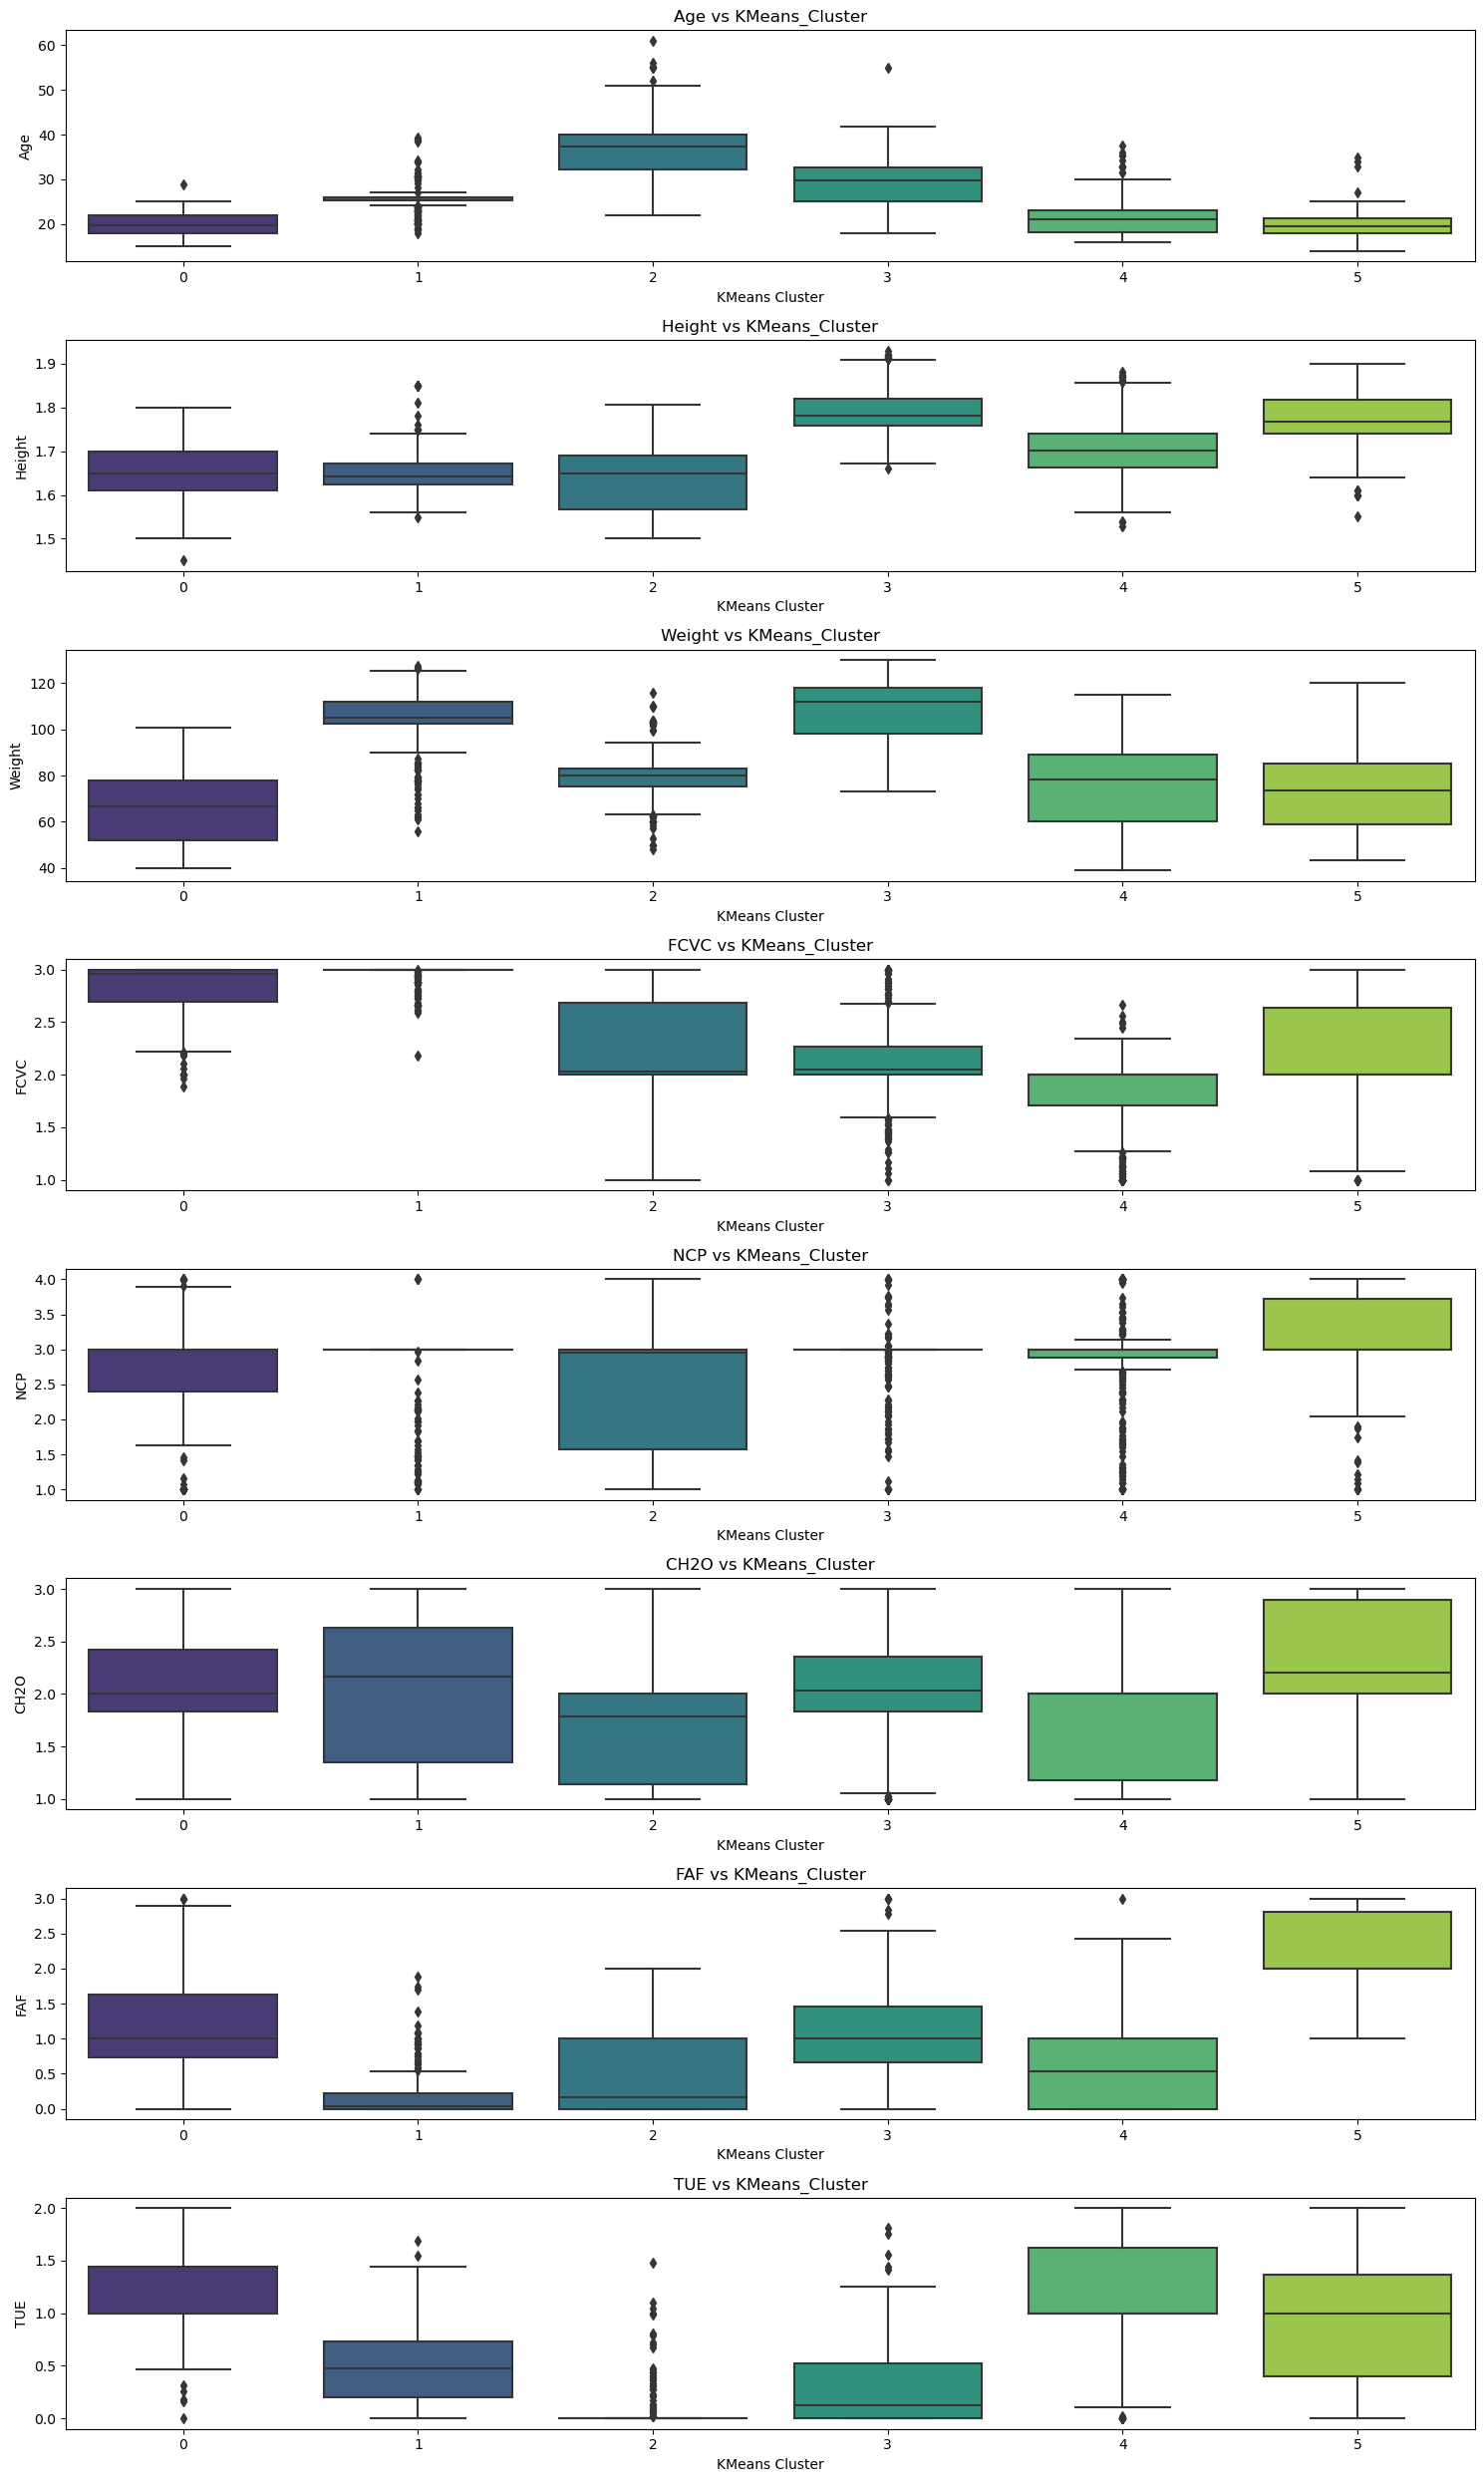

Resultados del ANOVA para cada variable cuantitativa:
Age: F-statistic = 470.3148, p-value = 0.0000
Height: F-statistic = 271.3346, p-value = 0.0000
Weight: F-statistic = 327.7543, p-value = 0.0000
FCVC: F-statistic = 378.4403, p-value = 0.0000
NCP: F-statistic = 35.0749, p-value = 0.0000
CH2O: F-statistic = 44.0011, p-value = 0.0000
FAF: F-statistic = 346.5894, p-value = 0.0000
TUE: F-statistic = 236.4139, p-value = 0.0000

Resultados del Post Hoc (Tukey HSD) para cada variable cuantitativa:

Age:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   5.5559    0.0   4.3719   6.7399   True
     0      2   16.564    0.0  15.2758  17.8522   True
     0      3   9.2368    0.0   8.0652  10.4083   True
     0      4   1.4032 0.0064   0.2582   2.5481   True
     0      5  -0.0834    1.0  -1.3019   1.1352  False
     1      2  11.0081    0.0   9.8184  12.1978   True


In [94]:
quantitative_data_with_clusters = quantitative_vars.copy()
quantitative_data_with_clusters['KMeans_Cluster'] = kmeans_labels
quantitative_data_with_clusters['Hierarchical_Cluster'] = hierarchical_labels

kmeans_clusters_six = quantitative_data_with_clusters[quantitative_data_with_clusters['KMeans_Cluster'] < 6]

# Crear un panel de boxplots para cada variable cuantitativa vs clusters de K-means
plt.figure(figsize=(15, 25))
for i, column in enumerate(quantitative_vars.columns, 1):
    plt.subplot(len(quantitative_vars.columns), 1, i)
    sns.boxplot(data=kmeans_clusters_six, x='KMeans_Cluster', y=column, palette='viridis')
    plt.title(f'{column} vs KMeans_Cluster')
    plt.xlabel('KMeans Cluster')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Realizar ANOVA y pruebas Post Hoc (Tukey HSD) para cada variable cuantitativa
anova_results = {}
posthoc_results = {}

for column in quantitative_vars.columns:
    # ANOVA
    anova_groups = [kmeans_clusters_six[kmeans_clusters_six['KMeans_Cluster'] == cluster][column] for cluster in range(6)]
    f_stat, p_value = f_oneway(*anova_groups)
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}
    
    # Prueba post hoc de Tukey HSD
    tukey_result = pairwise_tukeyhsd(endog=kmeans_clusters_six[column], groups=kmeans_clusters_six['KMeans_Cluster'], alpha=0.05)
    posthoc_results[column] = tukey_result.summary()

# Mostrar resultados de ANOVA
print("Resultados del ANOVA para cada variable cuantitativa:")
for variable, result in anova_results.items():
    print(f"{variable}: F-statistic = {result['F-statistic']:.4f}, p-value = {result['p-value']:.4f}")

# Mostrar resultados del post hoc (Tukey HSD)
print("\nResultados del Post Hoc (Tukey HSD) para cada variable cuantitativa:")
for variable, result in posthoc_results.items():
    print(f"\n{variable}:\n", result)


## Paso 6: Interpretación de segmentos

La solución de 6 segmentos propuesta bajo K-medias se interpreta asi:

1. Segmento 1: Jovenes con peso alto y bajo riesgo cardiovascular general.
2. Segmento 2: Edad media sin riesgo cardiovascular
3. Segmento 3: Edad media con alto riesgo cardiovascular
4. Segmento 4: Riesgo cardiovascular y metabólico
5. Segmento 5: Estado metabólico sano
6. Segmento 6: Jpovenes con peso normal sin riesgo cardiovascular.